In [2]:
import os
from glob import glob
import cv2
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tqdm import tqdm

In [2]:
IMG_SIZE=256
def pne_load_images(pne_image_dir, pne_img_size=256):
    pne_image_paths=sorted(glob(os.path.join(pne_image_dir,'*.png')))

    pne_images=[]

    for pne_img_path in pne_image_paths:
        pne_img=cv2.imread(pne_img_path, cv2.IMREAD_GRAYSCALE)
        pne_img_resized=cv2.resize(pne_img, (pne_img_size,pne_img_size))/255.0
        pne_images.append(np.expand_dims(pne_img_resized, axis=-1))
    
    return np.array(pne_images, dtype=np.float32)

pne_image_dir='Chest X-Ray Images Dataset/PNEUMONIA/'


X_pne=pne_load_images(pne_image_dir, IMG_SIZE)

print("pne image shape:", X_pne.shape)


pne image shape: (1800, 256, 256, 1)


In [3]:
IMG_SIZE=256
def covid_load_images(covid_image_dir, covid_img_size=256):
    covid_image_paths=sorted(glob(os.path.join(covid_image_dir,'*.png')))

    covid_images=[]

    for covid_img_path in covid_image_paths:
        covid_img=cv2.imread(covid_img_path, cv2.IMREAD_GRAYSCALE)
        covid_img_resized=cv2.resize(covid_img, (covid_img_size,covid_img_size))/255.0
        covid_images.append(np.expand_dims(covid_img_resized, axis=-1))
    
    return np.array(covid_images, dtype=np.float32)

covid_image_dir='Chest X-Ray Images Dataset/COVID/'


X_covid=covid_load_images(covid_image_dir, IMG_SIZE)

print("covid image shape:", X_covid.shape)

covid image shape: (1626, 256, 256, 1)


In [4]:
IMG_SIZE=256
def nor_load_images(nor_image_dir, nor_img_size=256):
    nor_image_paths=sorted(glob(os.path.join(nor_image_dir,'*.png')))

    nor_images=[]

    for nor_img_path in nor_image_paths:
        nor_img=cv2.imread(nor_img_path, cv2.IMREAD_GRAYSCALE)
        nor_img_resized=cv2.resize(nor_img, (nor_img_size,nor_img_size))/255.0
        nor_images.append(np.expand_dims(nor_img_resized, axis=-1))
    
    return np.array(nor_images, dtype=np.float32)

nor_image_dir='Chest X-Ray Images Dataset/NORMAL/'


X_nor=nor_load_images(nor_image_dir, IMG_SIZE)

print("normal image shape:", X_pne.shape)

normal image shape: (1800, 256, 256, 1)


In [7]:
fold1='Chest X-Ray Images Dataset/PNEUMONIA/'
all=os.listdir(fold1)
print(len(all))
fold2='Chest X-Ray Images Dataset/NORMAL/'
all=os.listdir(fold2)
print(len(all))
fold3='Chest X-Ray Images Dataset/COVID/'
all=os.listdir(fold3)
print(len(all))

1800
1802
1626


In [8]:
import os
import shutil
import random

# Path to your original dataset (all images currently in class folders)
dataset_dir = "Chest X-Ray Images Dataset/"  # Change if your folder is elsewhere

# Target folders for train and test
train_dir = os.path.join(dataset_dir, "train")
test_dir = os.path.join(dataset_dir, "test")

# Make sure target folders exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# List of classes (folders in your dataset)
classes = ["COVID", "NORMAL", "PNEUMONIA"]

# Split ratio
split_ratio = 0.8  # 80% train, 20% test

for cls in classes:
    cls_source = os.path.join(dataset_dir, cls)
    if not os.path.exists(cls_source):
        continue  # Skip if class folder doesn't exist
    
    images = os.listdir(cls_source)
    random.shuffle(images)
    
    split_index = int(len(images) * split_ratio)
    
    train_images = images[:split_index]
    test_images = images[split_index:]
    
    # Create class folders in train and test
    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(test_dir, cls), exist_ok=True)
    
    # Move images to train folder
    for img in train_images:
        shutil.move(os.path.join(cls_source, img), os.path.join(train_dir, cls, img))
    
    # Move images to test folder
    for img in test_images:
        shutil.move(os.path.join(cls_source, img), os.path.join(test_dir, cls, img))

print("Dataset successfully split into train and test folders!")

Dataset successfully split into train and test folders!


Found 4181 images belonging to 3 classes.
Found 1047 images belonging to 3 classes.
Class weight: {0: 1.072051282051282, 1: 0.9671524404348831, 2: 0.9678240740740741}


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 291s 2s/step - auc_2: 0.9222 - loss: 0.5390 - val_auc_2: 0.9765 - val_loss: 0.3221
Epoch 2/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 213s 2s/step - auc_2: 0.9692 - loss: 0.3246 - val_auc_2: 0.9804 - val_loss: 0.2630
Epoch 3/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 206s 2s/step - auc_2: 0.9757 - loss: 0.2835 - val_auc_2: 0.9886 - val_loss: 0.1946
Epoch 4/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 207s 2s/step - auc_2: 0.9797 - loss: 0.2590 - val_auc_2: 0.9800 - val_loss: 0.2680
Epoch 5/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 205s 2s/step - auc_2: 0.9824 - loss: 0.2424 - val_auc_2: 0.9916 - val_loss: 0.1699
Epoch 6/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 206s 2s/step - auc_2: 0.9844 - loss: 0.2199 - val_auc_2: 0.9887 - val_loss: 0.1911
Epoch 7/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 207s 2s/step - auc_2: 0.9848 - loss: 0.2195 - val_auc_2: 0.9919 - val_loss: 0.1681
Epoch 8/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 206s 2s/step - auc_2: 0.9862 - loss: 0.2045 - val_auc_2: 0.9917 - val_loss: 0.1626
Epoch 9/15
131/1

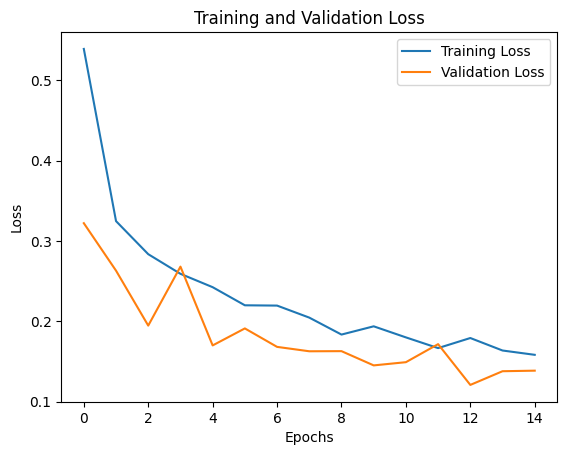

In [4]:
# System/Py Imports
import os
import shutil
import random
# Standard TF imports
import numpy as np
import tensorflow as tf
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import AUC
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Input, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt


# Define Hyperparameters
learning_rate = 0.001
epochs = 15
batch_size = 32

# Define the desired image dimensions
desired_width = 256
desired_height = 256

# Define the paths to your training and validation data
train_data_dir = str(os.getcwd()) + "\\Chest X-Ray Images Dataset\\train\\"
val_data_dir= str(os.getcwd()) + "\\Chest X-Ray Images Dataset\\test\\"

#data_generator = ImageDataGenerator()
# Training augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,        # normalize
    rotation_range=10,     # random rotation
    width_shift_range=0.1, # horizontal shift
    height_shift_range=0.1,# vertical shift
    brightness_range=[0.9,1.1],       # brightness
    zoom_range=0.1,# zoom  # flip(optional)
    fill_mode='nearest',# fill empty pixels
    validation_split=0.2
)

# Validation should NOT be augmented, only rescaled
val_datagen = ImageDataGenerator(rescale=1./255)

# Load from directory and apply augmentation in batches
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode="categorical",
    shuffle=False,
    seed=42
)

# CNN

model = tf.keras.Sequential([
    Input(shape=(256, 256, 3)),
    Conv2D(32, 3, activation="relu", padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, 3, activation="relu", padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, 3, activation="relu", padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation="relu"),
    Dropout(0.2),
    Dense(3, activation="softmax")
])
y_train_classes=train_generator.classes
class_weights=compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train_classes),
    y=y_train_classes
)
class_weights=dict(enumerate(class_weights))
print("Class weight:",class_weights)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss=CategoricalCrossentropy(), metrics=[AUC()])

# Trains using training_generator and validation_generator
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    class_weight=class_weights,
    validation_data=val_generator,
    validation_steps=len(val_generator))

# Plot the training and validation loss
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('datasetRun.png')



In [5]:
model.evaluate(val_generator)

33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 272ms/step - auc_2: 0.9941 - loss: 0.1385


[0.13851957023143768, 0.9940553307533264]

In [6]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Get true labels and predictions for the test set
y_true = val_generator.classes
y_pred_probs = model.predict(val_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Detailed metrics
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=val_generator.class_indices.keys()))

33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 283ms/step
Confusion Matrix:
 [[310  11   5]
 [  1 358   2]
 [  4  28 328]]
              precision    recall  f1-score   support

       COVID       0.98      0.95      0.97       326
      NORMAL       0.90      0.99      0.94       361
   PNEUMONIA       0.98      0.91      0.94       360

    accuracy                           0.95      1047
   macro avg       0.95      0.95      0.95      1047
weighted avg       0.95      0.95      0.95      1047



In [7]:
for i in range(len(val_generator)):
    x, y_true = val_generator[i]
    y_pred = np.argmax(model.predict(x), axis=1)
    print("Actual:", np.argmax(y_true, axis=1), "Predicted:", y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step
Actual: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] Predicted: [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step
Actual: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] Predicted: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step
Actual: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] Predicted: [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 1 0 0 0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step
Actual: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] Predicted: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step
Actual: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] Predicted: [1 2 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step
Actual: [0 

In [8]:
y_pred_probs = model.predict(val_generator)
print(y_pred_probs[:5])  # first 5 predictions

33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 270ms/step
[[9.7602022e-01 5.7136320e-04 2.3408366e-02]
 [9.9869591e-01 3.1814948e-04 9.8594441e-04]
 [9.6791571e-01 2.6225224e-02 5.8590882e-03]
 [9.7123700e-01 7.4097458e-03 2.1353319e-02]
 [9.9866831e-01 1.0012210e-04 1.2316303e-03]]


In [9]:
print(val_generator.class_indices)

{'COVID': 0, 'NORMAL': 1, 'PNEUMONIA': 2}


In [10]:
model.save('pneumoniaCovidTesterMy.keras')

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = tf.keras.models.load_model('pneumoniaCovidTesterMy.keras')

class_label=["Covid-19","Normal", "Pneumonia"]
# Load and preprocess the image you want to classify
img_path = 'COVID/images/COVID-999.png'  # Replace with the path to your image
img = image.load_img(img_path, target_size=(256, 256))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)  # Add batch dimension
img = img / 255.0  # Normalize pixel values

# Make predictions
predictions = model.predict(img)

# Get the predicted class (index with the highest probability)
predicted_class = np.argmax(predictions,axis=1)[0]
confidence=np.max(predictions)*100

print(f"Prediction:{class_label[predicted_class]}({confidence:.2f}% confidence)")
# Print the predicted class or label


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
Prediction:Covid-19(99.87% confidence)


In [48]:
print(model)

<Sequential name=sequential_2, built=True>


In [49]:
from tensorflow.keras.models import Sequential
for i,layer in enumerate(model.layers):
    print(i,layer.name,layer.__class__.__name__)

0 conv2d_6 Conv2D
1 max_pooling2d_6 MaxPooling2D
2 conv2d_7 Conv2D
3 max_pooling2d_7 MaxPooling2D
4 conv2d_8 Conv2D
5 max_pooling2d_8 MaxPooling2D
6 flatten_2 Flatten
7 dense_4 Dense
8 dropout_2 Dropout
9 dense_5 Dense
